## Singapore Job Market – Phase 3 EDA Notebook
Reads cleaned CSV from Phase 2 and spits out stats + charts into reports/figures/.

### 1. Notebook Setup & Load

##### 1.1 Imports & paths

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

PROJECT_ROOT = Path("..").resolve()
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

from src.data_ingestion import load_raw_data
from src.config import PH2_CLEANED_CSV_PATH

# Display options
pd.set_option("display.max_columns", 50)
sns.set_theme(style="whitegrid")

#Format numeric display throughout the nb
pd.options.display.float_format = '{:,.0f}'.format

##### 1.2. Load data

In [7]:
df = load_raw_data(PH2_CLEANED_CSV_PATH)
df.shape, df.head()

((1044587, 25),
   employmentTypes metadata_expiryDate  metadata_isPostedOnBehalf  \
 0       Permanent          2023-05-08                      False   
 1       Permanent          2023-05-08                      False   
 2       Full Time          2023-04-22                      False   
 3       Permanent          2023-05-08                      False   
 4       Full Time          2023-05-08                      False   
 
   metadata_jobPostId metadata_newPostingDate metadata_originalPostingDate  \
 0   MCF-2023-0252866              2023-04-08                   2023-03-30   
 1   MCF-2023-0273977              2023-04-08                   2023-04-08   
 2   MCF-2023-0273994              2023-04-08                   2023-04-08   
 3   MCF-2023-0273991              2023-04-08                   2023-04-08   
 4   MCF-2023-0273976              2023-04-08                   2023-04-08   
 
    metadata_repostCount  metadata_totalNumberJobApplication  \
 0                     2          

### 2. Basic overview & descriptive stats

##### 2.1 Dataframe Info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044587 entries, 0 to 1044586
Data columns (total 25 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   employmentTypes                     1044587 non-null  object 
 1   metadata_expiryDate                 1044587 non-null  object 
 2   metadata_isPostedOnBehalf           1044587 non-null  bool   
 3   metadata_jobPostId                  1044587 non-null  object 
 4   metadata_newPostingDate             1044587 non-null  object 
 5   metadata_originalPostingDate        1044587 non-null  object 
 6   metadata_repostCount                1044587 non-null  int64  
 7   metadata_totalNumberJobApplication  1044587 non-null  int64  
 8   metadata_totalNumberOfView          1044587 non-null  int64  
 9   minimumYearsExperience              1044587 non-null  int64  
 10  numberOfVacancies                   1044587 non-null  int64  
 11  positionLev

##### 2.2 overall descriptive stats

In [9]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
employmentTypes,1044587,8,Permanent,458138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
metadata_expiryDate,1044587,449,2023-07-28,4487,NaN,NaN,NaN,NaN,NaN,NaN,NaN
metadata_isPostedOnBehalf,1044587,2,False,982722,NaN,NaN,NaN,NaN,NaN,NaN,NaN
metadata_jobPostId,1044587,1044587,MCF-2023-0252866,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
metadata_newPostingDate,1044587,429,2023-06-09,4508,NaN,NaN,NaN,NaN,NaN,NaN,NaN
metadata_originalPostingDate,1044587,603,2023-07-14,4029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
metadata_repostCount,"1,044,587",NaN,NaN,NaN,0,0,0,0,0,0,2
metadata_totalNumberJobApplication,"1,044,587",NaN,NaN,NaN,2,10,0,0,0,1,"1,342"
metadata_totalNumberOfView,"1,044,587",NaN,NaN,NaN,27,82,0,1,4,17,"8,190"
minimumYearsExperience,"1,044,587",NaN,NaN,NaN,3,3,0,1,2,4,88


### 3. Descriptive statistics by category

##### 3.1 Job counts & salary summary by sector

In [10]:
sector_stats = (
     df.groupby(df["primary_category"])
     .agg(
        job_count=("metadata_jobPostId", "nunique"),
        avg_salary=("average_salary", "mean"),
        min_salary=("average_salary", "min"),
        max_salary=("average_salary", "max"),
    )
    .astype(float)
    .sort_values("job_count", ascending=False)
)
sector_stats.head(20)

,job_count,avg_salary,min_salary,max_salary
primary_category,,,,
Admin / Secretarial,"102,715","3,119",1,"376,000"
Information Technology,"100,142","7,308",1,"270,000"
Engineering,"99,675","4,990",1,"179,000"
Accounting / Auditing / Taxation,"78,647","4,549",1,"12,666,400"
Building and Construction,"74,014","4,704",1,"65,000"
Customer Service,"64,864","3,378",1,"500,000"
F&B,"59,678","3,761",1,"277,554"
Banking and Finance,"46,635","7,695",1,"302,500"
Logistics / Supply Chain,"44,391","3,949",1,"175,000"


### 4. Anomaly detection

##### 4.1 Min Year Experience anomalies (>30 years or <0 years)


In [22]:
# Filter for minyearexperience anomalies
yrexp_anomalies = df[
    (df["minimumYearsExperience"] >= 30) | (df["minimumYearsExperience"] < 0)
][
    [
        "metadata_jobPostId",
        "title",
        "primary_category",
        "minimumYearsExperience",
        "average_salary",
        "salary_minimum",
        "salary_maximum",
    ]
]

# Count & percentage
anomaly_count = len(yrexp_anomalies)
anomaly_pct = (anomaly_count / len(df)) * 100

print(f"Experience Anomalies: {anomaly_count:,} records ({anomaly_pct:.2f}%)")

# Display top anomalies
yrexp_anomalies.sort_values(by=["minimumYearsExperience", "average_salary"], ascending=False).tail(10)


Experience Anomalies: 111 records (0.01%)


,metadata_jobPostId,title,primary_category,minimumYearsExperience,average_salary,salary_minimum,salary_maximum
898010,MCF-2024-0485697,Contract - Permanent Dental Assistant (5 Days ...,Healthcare / Pharmaceutical,30,"2,150",1800,2500
915031,MCF-2024-0519421,Temporary / Temp - Perm Dental Assistant #hty,Healthcare / Pharmaceutical,30,"2,150",1800,2500
928141,MCF-2024-0546633,Contract - Permanent Dental Assistant (5 Days ...,Healthcare / Pharmaceutical,30,"2,150",1800,2500
941653,MCF-2024-0567690,Contract - Permanent Dental Assistant (5 Days ...,Healthcare / Pharmaceutical,30,"2,100",1800,2400
985296,MCF-2024-0663382,Contract - Permanent Dental Assistant (5 Days ...,Healthcare / Pharmaceutical,30,"2,100",1800,2400
1001468,MCF-2024-0696232,Contract To Perm Clinic / Dental Receptionist ...,Healthcare / Pharmaceutical,30,"2,100",1800,2400
1001521,MCF-2024-0696149,Temporary Dental Assistant (5.5 Days Work Week...,Healthcare / Pharmaceutical,30,"2,100",1800,2400
1024485,MCF-2024-0742201,Temporary Dental Assistant (5.5 Days Work Week...,Healthcare / Pharmaceutical,30,"2,100",1800,2400
1028377,MCF-2024-0750337,Contract To Perm Clinic / Dental Receptionist ...,Healthcare / Pharmaceutical,30,"2,100",1800,2400
976849,MCF-2024-0644404,Temporary / Temp - Perm Dental Assistant #hty,Healthcare / Pharmaceutical,30,"2,000",1800,2200


##### 4.2 Salary anamolies ( 1% > average_salary > 99% )

In [17]:
# Define upper and lower thresholds
upper_thr = df["average_salary"].quantile(0.99)
lower_thr = df["average_salary"].quantile(0.01)
print(f"Upper Threshold: {upper_thr:,.0f}  |  Lower Threshold: {lower_thr:,.0f}")

salary_anomalies = df[
    (df["average_salary"] > upper_thr) | (df["average_salary"] < lower_thr)
][
    [
        "metadata_jobPostId",
        "title",
        "primary_category",
        "average_salary",
        "salary_minimum",
        "salary_maximum",
    ]
]
anomaly_count = len(salary_anomalies)
anomaly_pct = (anomaly_count / len(df)) * 100
print (f"Anomaly:  Count {anomaly_count:,}  |  {anomaly_pct:.2f}% ") 
salary_anomalies.sort_values(by="salary_maximum", ascending=False).head(10)


Upper Threshold: 16,750  |  Lower Threshold: 800
Anomaly:  Count 19,852  |  1.90% 


,metadata_jobPostId,title,primary_category,average_salary,salary_minimum,salary_maximum
358928,MCF-2023-0659775,Accounts Executive - Gt,Accounting / Auditing / Taxation,"12,666,400",2800,25330000
92072,MCF-2023-0165468,Clinic Assistant,Medical / Therapy Services,"5,000,750",1500,10000000
572849,MCF-2023-0897073,Senior Recruiter,Customer Service,"500,000",1,1000000
902921,MCF-2024-0492535,Chef,F&B,"277,554",3100,552007
834483,MCF-2024-0351969,Administrative Associate (1 Year Contract),Admin / Secretarial,"376,000",288000,464000
837666,MCF-2024-0359424,"Vice President, Strategic Accounts",Telecommunications,"370,000",340000,400000
629016,MCF-2023-1012177,"Director, Sales -public Cloud- Singapore",Customer Service,"375,000",350000,400000
556593,MCF-2023-0863754,Lead Data Scientist (large Language Models),Information Technology,"200,000",1,400000
264197,MCF-2023-0564803,Head Of Legal - Marketing,Legal,"352,500",325000,380000
703221,MCF-2024-0085656,Major Account Manager,Sales / Retail,"277,500",185000,370000


##### 4.3 Removal of minyrexp and salary anomalies

In [18]:
# --- Filter out anomalies for visualization ---
# 1. Remove salary outliers (using lower_thr / upper_thr)
# 2. Remove experience anomalies (>30 years or <0)

df_cleaned = df[
    (df["average_salary"] >= lower_thr)
    & (df["average_salary"] <= upper_thr)
    & (df["minimumYearsExperience"].between(0, 30, inclusive="both"))
].copy()

print(
    f"After outlier & experience anomaly removal: {len(df_cleaned):,} rows remain "
    f"({100 * len(df_cleaned) / len(df):.2f}% of original)."
)

After outlier & experience anomaly removal: 1,024,703 rows remain (98.10% of original).


##### 4.3 Visual sanity check after filtering

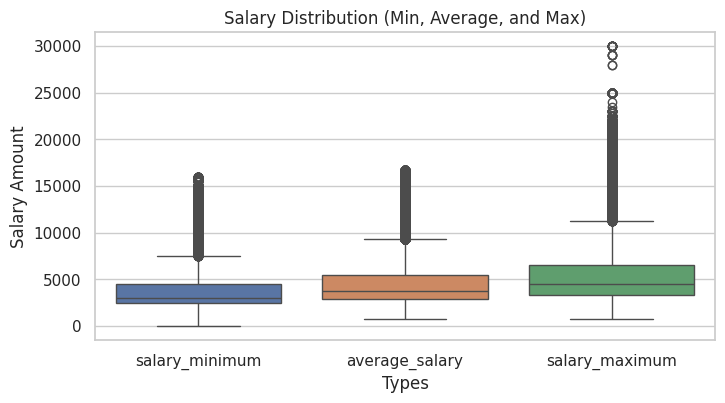

In [110]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_cleaned[[
    "salary_minimum",
    "average_salary", 
    "salary_maximum" ]])
plt.title("Salary Distribution (Min, Average, and Max)")
plt.xlabel("Types")
plt.ylabel("Salary Amount")
plt.show()

### 5. Correlations

experience ↔ salary
position level ↔ salary (via groupby, since positionLevels is categorical)

##### 5.1 numeric correlation matrix

In [111]:
corr_cols = [
    "average_salary",
    "salary_minimum",
    "salary_maximum",
    "minimumYearsExperience",
    "numberOfVacancies",
    "posting_duration",
    "metadata_totalNumberJobApplication",
    "metadata_totalNumberOfView",
]

corr_df = df_cleaned[corr_cols].corr()
corr_df


,average_salary,salary_minimum,salary_maximum,minimumYearsExperience,numberOfVacancies,posting_duration,metadata_totalNumberJobApplication,metadata_totalNumberOfView
average_salary,1,1,1,1,-0,-0,0,0
salary_minimum,1,1,1,1,-0,-0,0,0
salary_maximum,1,1,1,1,-0,-0,0,0
minimumYearsExperience,1,1,1,1,-0,-0,0,0
numberOfVacancies,-0,-0,-0,-0,1,0,-0,-0
posting_duration,-0,-0,-0,-0,0,1,0,0
metadata_totalNumberJobApplication,0,0,0,0,-0,0,1,1
metadata_totalNumberOfView,0,0,0,0,-0,0,1,1


##### 5.2 heatmap of correlations

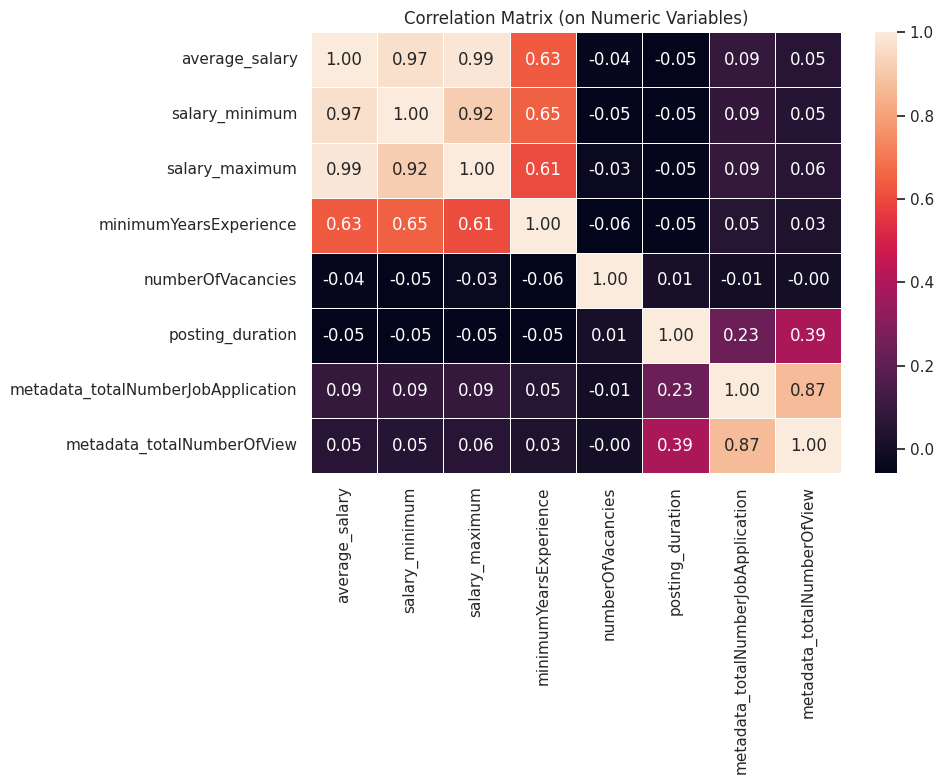

In [112]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (on Numeric Variables)")
plt.tight_layout()
plt.savefig(FIGURES_DIR / "corr_heatmap.png", dpi=150)
plt.show()

##### 5.3 Scatter Plot - experience vs salary

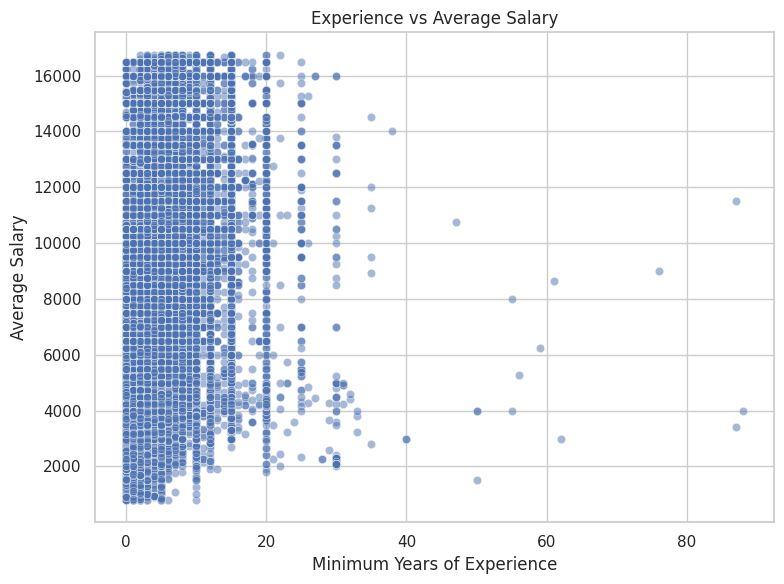

In [113]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_cleaned,
    x="minimumYearsExperience",
    y="average_salary",
    alpha=0.5,
)
plt.title("Experience vs Average Salary")
plt.xlabel("Minimum Years of Experience")
plt.ylabel("Average Salary")
plt.tight_layout()
plt.savefig(FIGURES_DIR / "experience_vs_salary_scatter.png", dpi=150)
plt.show()


##### 5.4 position level vs salary (grouped stats)

In [114]:
if "positionLevels" in df.columns:
    level_salary_stats = (
        df_cleaned.groupby("positionLevels")["average_salary"]
        .agg(["count", "mean", "min", "max"])
        .astype(float)
        .sort_values("mean", ascending=False)
    )
level_salary_stats

,count,mean,min,max
positionLevels,,,,
Senior Management,"19,647","9,171",900,"16,750"
Middle Management,"25,934","7,024",800,"16,750"
Professional,"108,440","6,656",800,"16,750"
Manager,"108,350","6,607",875,"16,750"
Senior Executive,"99,632","5,588",800,"16,750"
Executive,"252,485","4,121",800,"16,750"
Junior Executive,"166,680","3,382",800,"16,500"
Non-executive,"128,950","3,010",800,"16,500"
Fresh/entry level,"114,617","2,812",800,"16,500"


### 6. Trend analysis – postings by month & category

##### 6.1 overall postings per month

In [120]:
if "posting_month" in df.columns:
    monthly_counts = (
        df_cleaned.groupby("posting_month")["metadata_jobPostId"]
        .nunique()
        .reset_index(name="job_count")
        .sort_values("posting_month")
    )

monthly_counts.head()

,posting_month,job_count
0,2023-03,9919
1,2023-04,27079
2,2023-05,73688
3,2023-06,84339
4,2023-07,84570


6.2 line chart of job posting volume over time

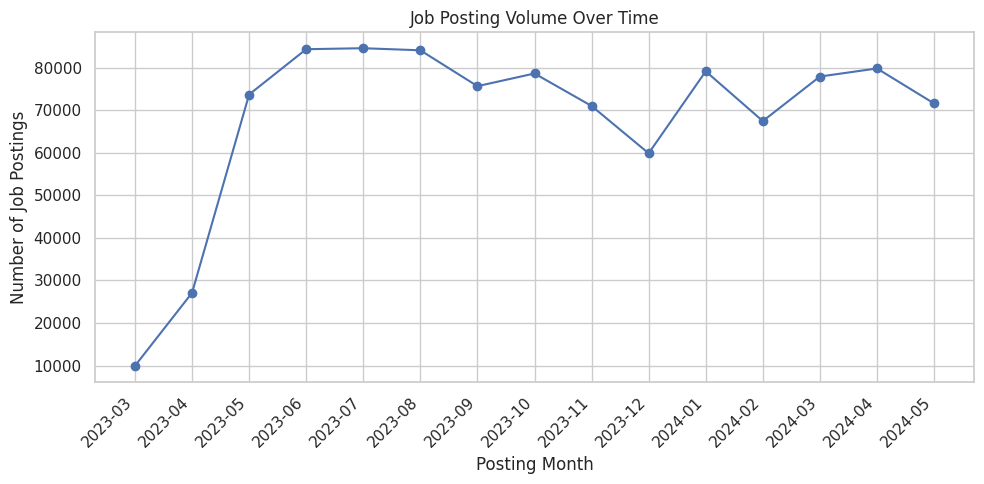

In [121]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_counts["posting_month"], monthly_counts["job_count"], marker="o")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Posting Month")
plt.ylabel("Number of Job Postings")
plt.title("Job Posting Volume Over Time")
plt.tight_layout()
plt.savefig(FIGURES_DIR / "job_postings_over_time.png", dpi=150)
plt.show()


##### 6.3 postings by month & category (top 10 categories)

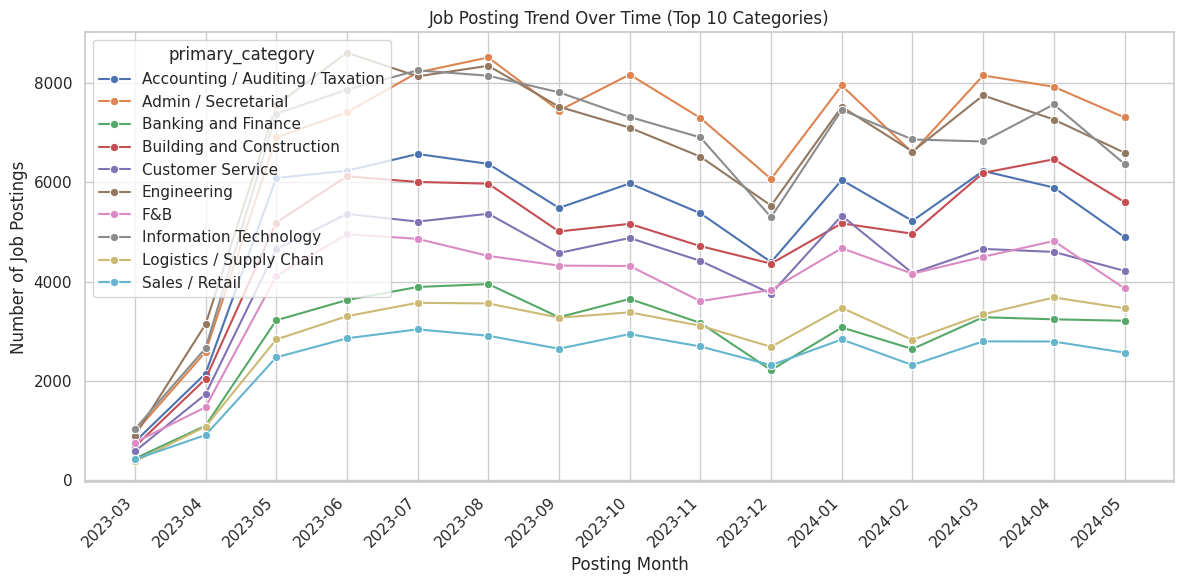

In [ ]:
top_n = 10

top_categories = (
    df["primary_category"].value_counts().head(top_n).index.tolist()
)

trend_df = (
    df_cleaned[df_cleaned["primary_category"].isin(top_categories)]
    .groupby(["posting_month", "primary_category"])["metadata_jobPostId"]
    .nunique()
    .reset_index(name="job_count")
)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=trend_df,
    x="posting_month",
    y="job_count",
    hue="primary_category",
    marker="o",
)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Posting Month")
plt.ylabel("Number of Job Postings")
plt.title(f"Job Posting Trend Over Time (Top {top_n} Categories)")
plt.tight_layout()
plt.savefig(FIGURES_DIR / "job_postings_over_time_by_category.png", dpi=150)
plt.show()


##### 6.4 Salary distribution by category (boxplot)

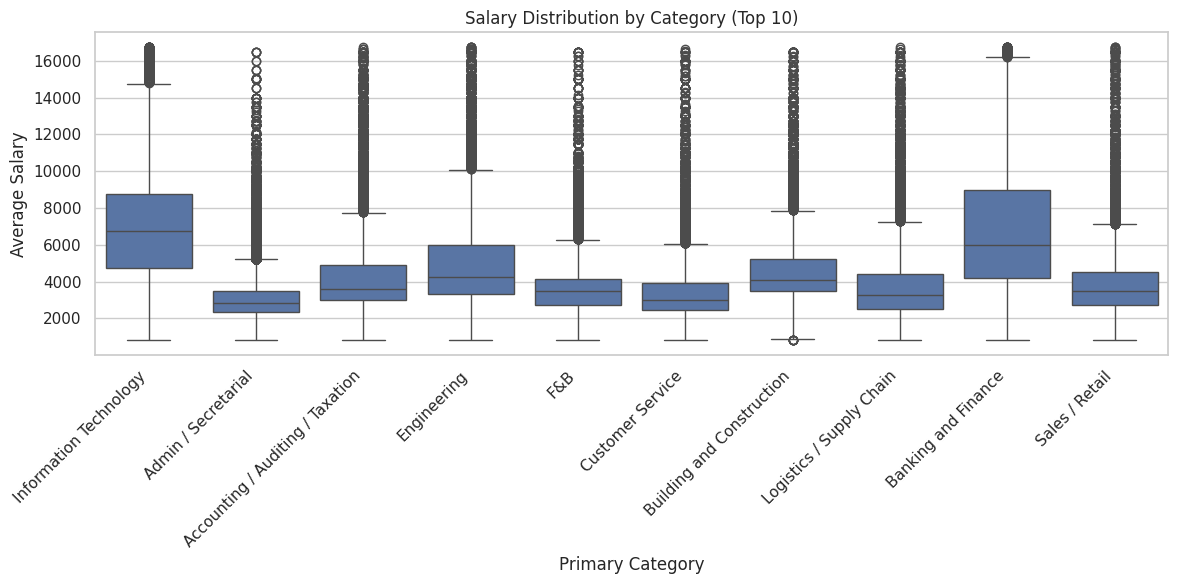

In [123]:
# Focus on top 10 categories for readability
top_n = 10
top_cats = df_cleaned["primary_category"].value_counts().head(top_n).index.tolist()

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_cleaned[df_cleaned["primary_category"].isin(top_cats)],
    x="primary_category",
    y="average_salary",
)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Primary Category")
plt.ylabel("Average Salary")
plt.title(f"Salary Distribution by Category (Top {top_n})")
plt.tight_layout()
plt.savefig(FIGURES_DIR / "salary_boxplot_by_category.png", dpi=150)
plt.show()


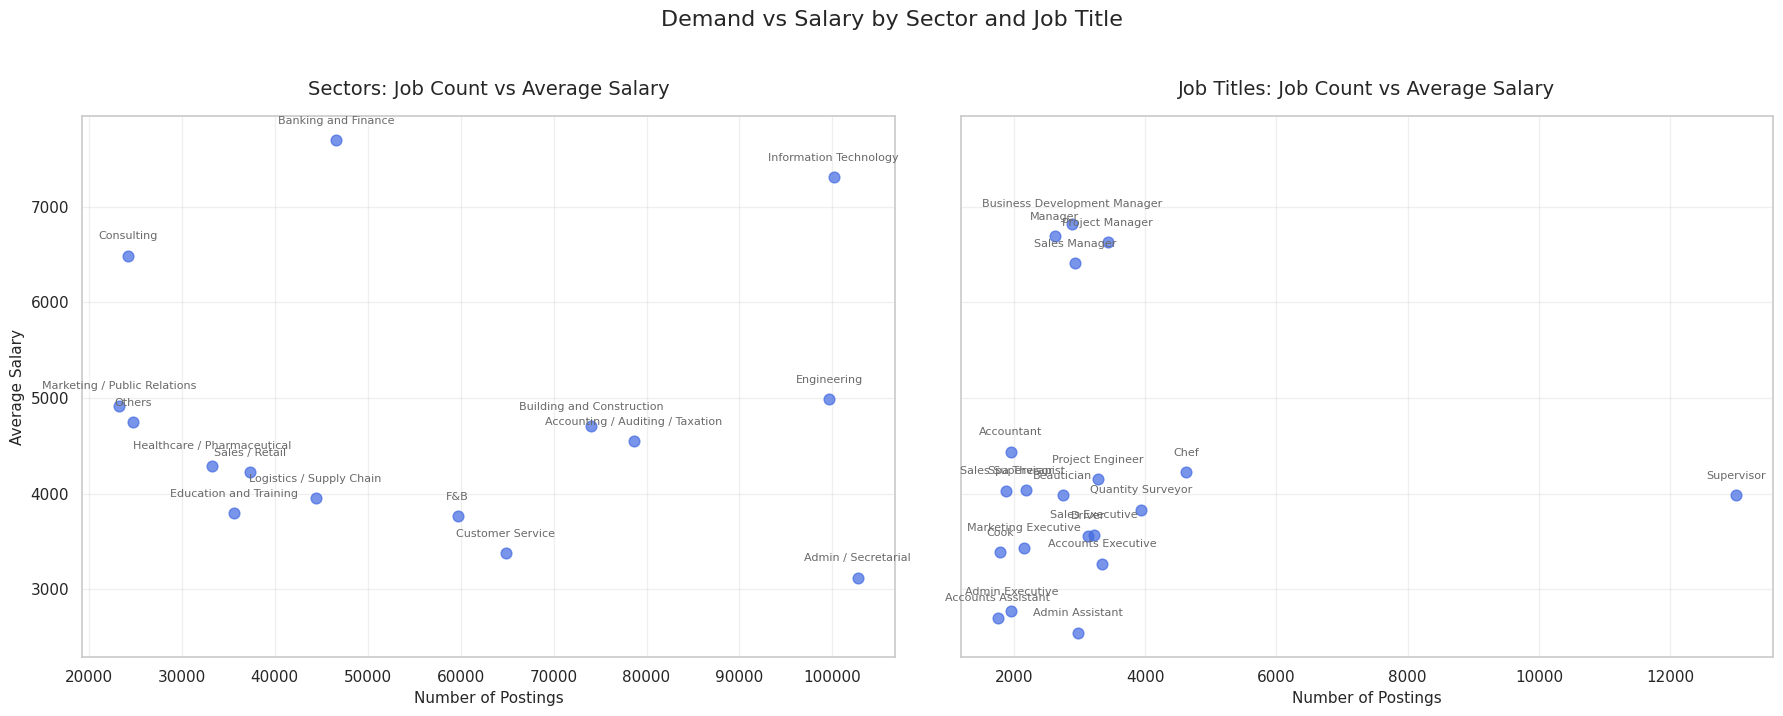

In [124]:
import matplotlib.pyplot as plt

# ---------- 1. Prepare sector-level stats ----------
top_n_sectors = 15
top_sectors = sector_stats.nlargest(top_n_sectors, "job_count").reset_index()

# ---------- 2. Prepare title-level stats ----------
title_stats = (
    df_cleaned.groupby("title")
    .agg(
        job_count=("metadata_jobPostId", "nunique"),
        avg_salary=("average_salary", "mean"),
    )
    .reset_index()
)
top_n_titles = 20
top_titles = title_stats.nlargest(top_n_titles, "job_count")

# ---------- 3. Combined 2×1 figure ----------
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

# --- Left: Sectors ---
ax = axes[0]
ax.scatter(
    top_sectors["job_count"],
    top_sectors["avg_salary"],
    s=60,
    alpha=0.7,
    color="royalblue",
)

for _, row in top_sectors.iterrows():
    ax.text(
        row["job_count"],
        row["avg_salary"] + 150,  # move label above the dot
        row["primary_category"],
        fontsize=8,
        color="dimgray",
        ha="center",
        va="bottom",
    )

ax.set_title("Sectors: Job Count vs Average Salary", fontsize=14, pad=15)
ax.set_xlabel("Number of Postings", fontsize=11)
ax.set_ylabel("Average Salary", fontsize=11)
ax.grid(alpha=0.3)

# --- Right: Job Titles ---
ax = axes[1]
ax.scatter(
    top_titles["job_count"],
    top_titles["avg_salary"],
    s=60,
    alpha=0.7,
    color="royalblue",
)

for _, row in top_titles.iterrows():
    ax.text(
        row["job_count"],
        row["avg_salary"] + 150,
        row["title"],
        fontsize=8,
        color="dimgray",
        ha="center",
        va="bottom",
    )

ax.set_title("Job Titles: Job Count vs Average Salary", fontsize=14, pad=15)
ax.set_xlabel("Number of Postings", fontsize=11)
ax.grid(alpha=0.3)

plt.suptitle("Demand vs Salary by Sector and Job Title", fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig(FIGURES_DIR / "demand_vs_salary_sector_and_title_labels_top.png", dpi=150)
plt.show()


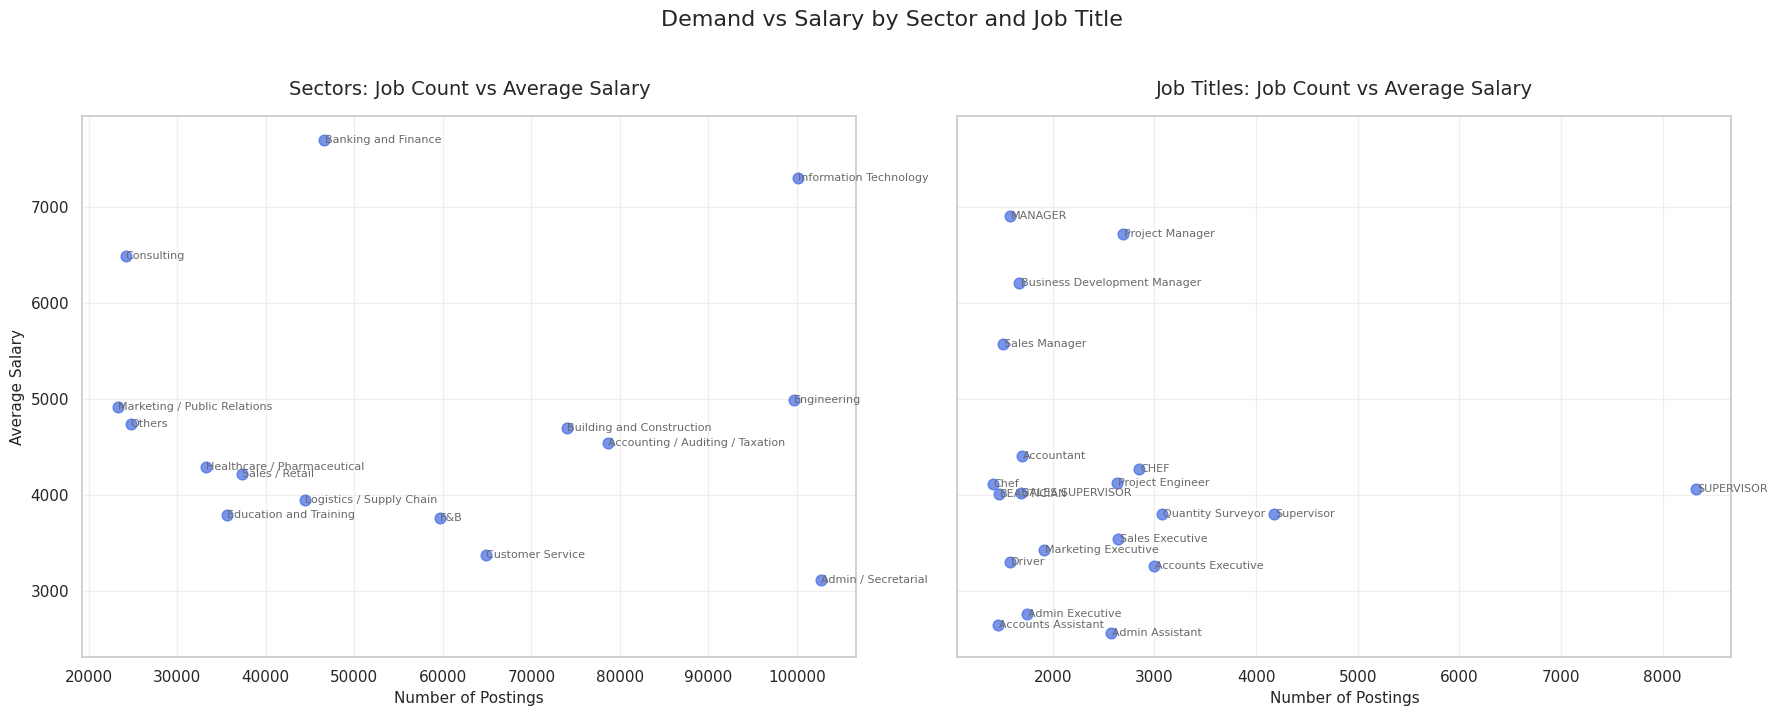

In [98]:
import matplotlib.pyplot as plt

# ---------- 1. Prepare sector-level stats (already have this above) ----------
# sector_stats =
# (
#   df.groupby(df["primary_category"])
#   .agg(
#       job_count=("metadata_jobPostId", "nunique"),
#       avg_salarys=("average_salary", "mean"),
#       min_salarys=("average_salary", "min"),
#       max_salarys=("average_salary", "max"),
#   )
#   .astype(float)
#   .sort_values("job_count", ascending=False)
# )

top_n_sectors = 15
top_sectors = sector_stats.nlargest(top_n_sectors, "job_count").reset_index()

# ---------- 2. Prepare title-level stats ----------
title_stats = (
    df_cleaned.groupby("title")
    .agg(
        job_count=("metadata_jobPostId", "nunique"),
        avg_salary=("average_salary", "mean"),
    )
    .reset_index()
)

top_n_titles = 20
top_titles = title_stats.nlargest(top_n_titles, "job_count")

# ---------- 3. Combined 2×1 figure ----------
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

# --- Left: sectors ---
ax = axes[0]
ax.scatter(
    top_sectors["job_count"],
    top_sectors["avg_salary"],
    s=60,
    alpha=0.7,
    color="royalblue",
)

for _, row in top_sectors.iterrows():
    ax.text(
        row["job_count"] + 10,
        row["avg_salary"],
        row["primary_category"],
        fontsize=8,
        color="dimgray",
        va="center",
    )

ax.set_title("Sectors: Job Count vs Average Salary", fontsize=14, pad=15)
ax.set_xlabel("Number of Postings", fontsize=11)
ax.set_ylabel("Average Salary", fontsize=11)
ax.grid(alpha=0.3)

# --- Right: titles ---
ax = axes[1]
ax.scatter(
    top_titles["job_count"],
    top_titles["avg_salary"],
    s=60,
    alpha=0.7,
    color="royalblue",
)

for _, row in top_titles.iterrows():
    ax.text(
        row["job_count"] + 10,
        row["avg_salary"],
        row["title"],
        fontsize=8,
        color="dimgray",
        va="center",
    )

ax.set_title("Job Titles: Job Count vs Average Salary", fontsize=14, pad=15)
ax.set_xlabel("Number of Postings", fontsize=11)
ax.grid(alpha=0.3)

plt.suptitle("Demand vs Salary by Sector and Job Title", fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig(FIGURES_DIR / "demand_vs_salary_sector_and_title.png", dpi=150)
plt.show()


##### 6.5 Distribution by employment type (countplot)

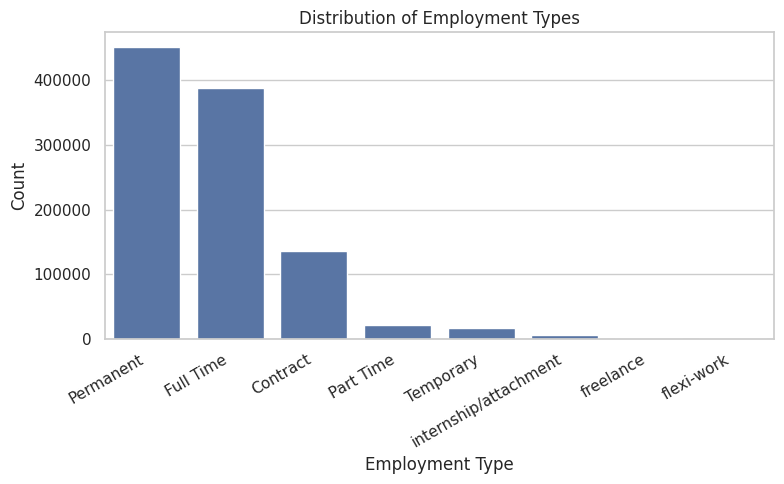

In [78]:
if "employmentTypes" in df_cleaned.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(
        data=df_cleaned,
        x="employmentTypes",
        order=df["employmentTypes"].value_counts().index,
    )
    plt.xticks(rotation=30, ha="right")
    plt.xlabel("Employment Type")
    plt.ylabel("Count")
    plt.title("Distribution of Employment Types")
    plt.tight_layout()
    plt.savefig(FIGURES_DIR / "employment_type_countplot.png", dpi=150)
    plt.show()
